In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [3]:
df=pd.read_csv('G:pravin/House_Price.csv',header=0)
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


EDD #look at the diff beween mean & mediun, 2nd min.25%,50%,75%,max here value uniformaly variate so has say that negative scale meas large scale other side n_hot_rooms,rainfall coloumn also has positive scale look or some outlier at the data

In [4]:
df.shape

(506, 19)

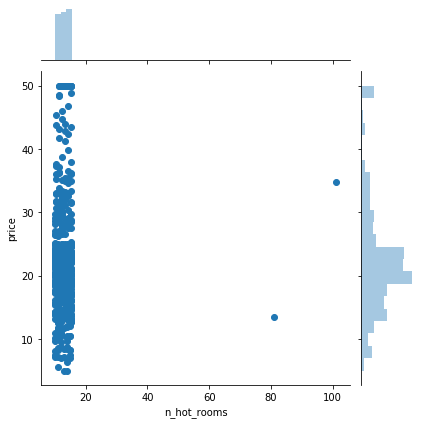

In [7]:
sns.jointplot(x='n_hot_rooms', y='price',data=df)    #2 outlier was in n_hot_rooms this data lies in 0-20  

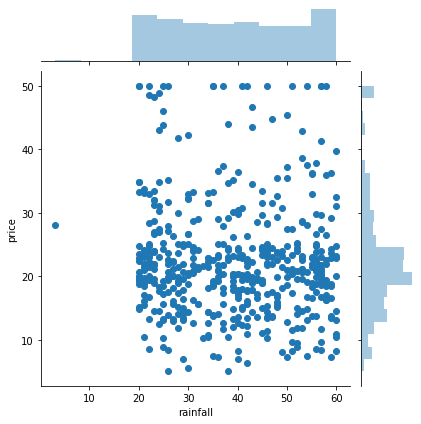

In [8]:
sns.jointplot(x='rainfall',y='price',data=df) #1 outlier due to some error,sampling error  etc


In [9]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


# countplot for categorical variable


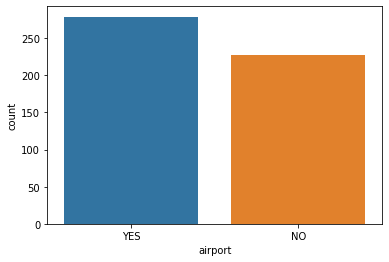

In [10]:
sns.countplot(x='airport',data=df)   #nothing to see everthing was fine eqully distrubution was there

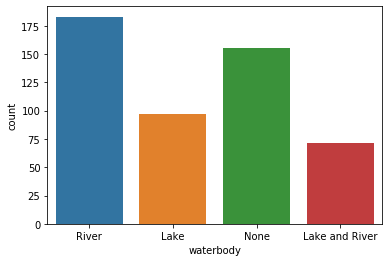

In [11]:
    sns.countplot(x='waterbody',data=df) #nothing usual equally disrtubuted

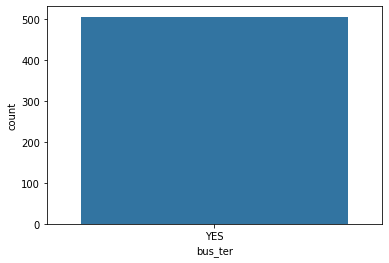

In [12]:
sns.countplot(x='bus_ter',data=df)   

above column not usful in analysis because it contain only one varible was not given any diffentiate value in prediction

Observations
1.Missing values in n_hos_beds 2.Skewness or outliers in crime rate 3.Outliers in n_hot_rooms and rainfall 4.Bus_ter has only 'Yes' value

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [17]:
np.percentile(df.n_hot_rooms,[99])

array([15.39952])


# outlier treament

In [19]:
np.percentile(df.n_hot_rooms,[99])   #outlier method in theory 99% value in array we need 1st value

array([15.39952])

In [20]:
np.percentile(df.n_hot_rooms,[99])[0]   #1st element of array

15.399519999999999

In [21]:
uv=np.percentile(df.n_hot_rooms,[99])[0]

In [22]:
df[df.n_hot_rooms > uv]  #this 101.12,81.12 was outlier was remove in below code

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [26]:
df.n_hot_rooms[(df.n_hot_rooms > 3*uv)]=3*uv    #just the warning not a error

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
np.percentile(df.rainfall,[1])[0]

20.0

In [28]:
lv=np.percentile(df.rainfall,[1])[0]

In [29]:
df[df.rainfall < lv]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [30]:
df.rainfall[(df.rainfall < 0.3*lv)]= 0.3*lv

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


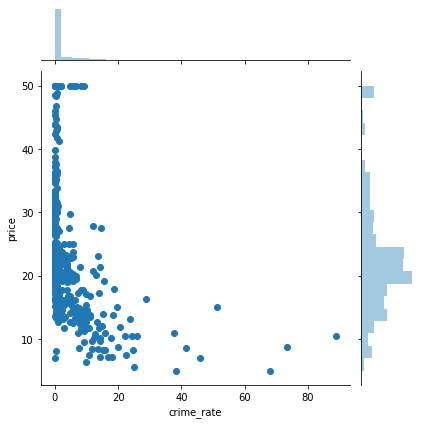

In [31]:
sns.jointplot(x='crime_rate', y='price', data=df)

above jointplot has no linear relationship was seen for 0 has large value in has price has some dense value in 20-30 so to treat 
outlier by logrithmic function, square root funtion,exponentialsoo 1st first transform then look at any outlier present or not


In [32]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


# missing value treament

In [33]:
df.info()   #n_hot_beds has 498 data you can see at edd(df.describe) but we cab get numerical varible here categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [34]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())   #fill missing by mean

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

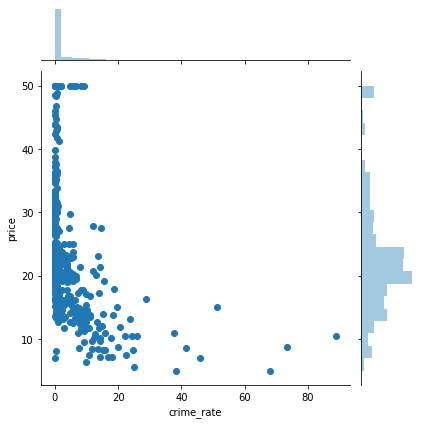

In [36]:
sns.jointplot(x='crime_rate' ,y='price',data=df)

In [37]:
df.crime_rate = np.log(1+df.crime_rate)

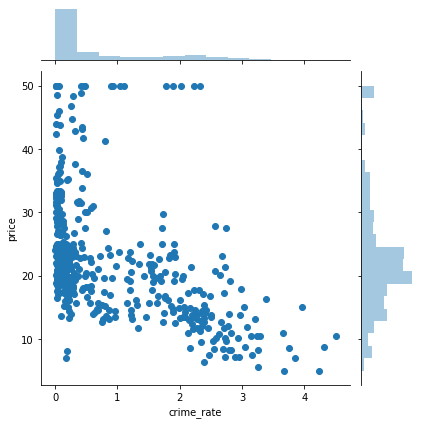

In [38]:
sns.jointplot(x='crime_rate' ,y='price',data=df)

In [39]:
df['avg_dist']= (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [40]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [41]:
del df['dist1']

In [41]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [42]:
del df['dist2']  #because the contain same information so delete it and take avd dist

In [43]:
del df['dist3']

In [44]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,4.01,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,5.06,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.96,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,6.0625


In [45]:
del df['bus_ter']  #it contain only single value so its dosent impact on model accuracy

# creating dummy variable

In [46]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,4.01,24.7,4.98,YES,5.480,11.19200,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,5.06,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.97,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.96,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,6.0625


In [47]:
df = pd.get_dummies(df)   #automatically dummy variable created directly (note dummy variable less than no. of categories
                           #in so delete one of them if not this called as full negative correlation dataframe)


In [48]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist4,teachers,poor_prop,...,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,4.01,24.7,4.98,...,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,5.06,22.2,9.14,...,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.97,22.2,4.03,...,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.96,21.3,2.94,...,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,21.3,5.33,...,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


In [49]:
del df['waterbody_None']  #for deleting this coloumn reason if all 0 then obsualy waterbody_None so used any more in dataframe

In [50]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,4.01,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,5.06,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.97,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.96,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0


In [51]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.251355,0.248200,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,-0.182867,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.587703,-0.580101,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,0.134486,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.706481,-0.705819,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,0.115401,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.768589,-0.764873,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,0.073903,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.208464,0.205397,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,-0.163774,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.746904,-0.746707,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,-0.005101,0.005101,0.003452,-0.004354,-0.088609
dist1,0.251355,-0.587703,-0.706481,-0.768589,0.208464,-0.746904,1.000000,0.994073,0.232834,-0.498823,-0.030365,-0.025398,-0.036812,-0.706319,0.998933,-0.025208,0.025208,0.035171,-0.023236,0.030763
dist4,0.248200,-0.580101,-0.705819,-0.764873,0.205397,-0.746707,0.994073,1.000000,0.228256,-0.496084,-0.021534,-0.016003,-0.032596,-0.703508,0.997042,-0.020022,0.020022,0.031696,-0.014671,0.033829
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,0.232834,0.228256,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,-0.069437,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.498823,-0.496084,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,0.095054,-0.095054,0.003197,0.020620,-0.109004


see above price was our dependent varible and look at which has high -ve correlate to price (room_num),we delete parks column from dataframe because it has negative correlation and there many more (air_qual,age,poor_prop etc) but not delete this coloumn for only parks due business intuition behind this

In [52]:
x=sn.add_constant(df['room_num'])  

In [53]:
lm =sn.OLS(df['price'],x).fit()

In [54]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           1.31e-74
Time:                        15:14:39   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
y = df['price']   #dependent variable

In [56]:
x = df[['room_num']]  #2[[]] for make as a 2d array

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lm2 = LinearRegression()

In [59]:
lm2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print(lm2.intercept_, lm2.coef_)   #gives bit.not, bita.one value respectively

-34.65924312309721 [9.09966966]


In [61]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      sub

In [62]:
lm2.predict(x)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [63]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        *Deprecated*
    color : matplotlib color, optional
        Colo

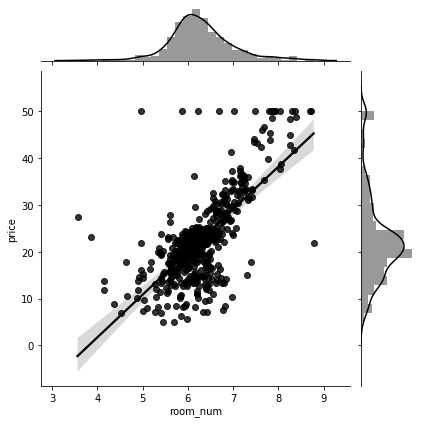

In [64]:
sns.jointplot(x= df['room_num'], y =df['price'], data=df, kind="reg" ,color="black")

In [65]:
df

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,4.01,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,5.06,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.97,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.96,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.060747,41.93,0.573,6.593,69.1,2.64,2.06,19.0,9.67,9.348,12.17920,27,0.056006,2.4775,1,0,0,1,0
502,20.6,0.044275,41.93,0.573,6.120,76.7,2.44,2.14,19.0,9.08,6.612,13.16480,20,0.059903,2.2875,0,1,0,1,0
503,23.9,0.058986,41.93,0.573,6.976,91.0,2.34,1.98,19.0,5.64,5.478,12.19120,31,0.057572,2.1675,1,0,0,0,0
504,22.0,0.103991,41.93,0.573,6.794,89.3,2.54,2.31,19.0,6.48,7.940,15.17600,47,0.060694,2.3900,0,1,0,0,0


# multi linear model

In [66]:
X_multi = df.drop('price',axis = 1)    # axis=1 for drop coloumn axis = 0 drop rows except price rest was in x_multi 
                                       # (inepedent variable)

In [67]:
X_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,4.35,4.01,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,4.99,5.06,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,5.03,4.97,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,6.21,5.96,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0


In [68]:
Y_multi =df['price']    #dependent variable

In [69]:
Y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [70]:
X_multi_cons = sn.add_constant(X_multi)   #add constant coloumn in dataset add coloumn for proxy

In [71]:
X_multi_cons.head()

,const,crime_rate,resid_area,air_qual,room_num,age,dist1,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,4.35,4.01,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,4.99,5.06,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,5.03,4.97,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,6.21,5.96,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0


In [72]:
lm_multi = sn.OLS(Y_multi, X_multi_cons).fit()

In [73]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     70.12
Date:                Wed, 23 Jun 2021   Prob (F-statistic):          1.62e-122
Time:                        15:14:52   Log-Likelihood:                -1515.9
No. Observations:                 506   AIC:                             3070.
Df Residuals:                     487   BIC:                             3150.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.2854      3.535     -1.212      0.226     -11.231       2.660
crime_rate                   0.0307      0.350      0.088      0.930      -0.657       0.718
resid_area                  -0.0424      0.058     -0.733      0.464      -0.156       0.071
air_qual                   -20.8679      5.910     -3.531      0.000     -32.481      -9.255
room_num                     4.0140      0.429      9.366      0.000       3.172       4.856
age                         -0.0055      0.014     -0.403      0.687      -0.032       0.021
dist1                       -0.1206      2.730     -0.044      0.965      -5.484       5.243
dist4                        0.0367      1.642      0.022      0.982      -3.190       3.263
teachers                     1.0118      0.123      8.251      0.000       0.771       1.253
poor_prop                   -0.5792      0.053    -10.953      0.000      -0.683      -0.475
n_hos_beds                   0.3396      0.153      2.215      0.027       0.038       0.641
n_hot_rooms                  0.0871      0.083      1.051      0.294      -0.076       0.250
rainfall                     0.0163      0.018      0.911      0.363      -0.019       0.052
parks                       59.2201     51.862      1.142      0.254     -42.680     161.120
avg_dist                    -1.1325      3.873     -0.292      0.770      -8.743       6.478
airport_NO                  -2.6995      1.779     -1.518      0.130      -6.194       0.795
airport_YES                 -1.5859      1.786     -0.888      0.375      -5.095       1.923
waterbody_Lake               0.2586      0.643      0.402      0.688      -1.005       1.523
waterbody_Lake and River    -0.6880      0.718     -0.958      0.338      -2.099       0.723
waterbody_River             -0.2776      0.549     -0.506      0.613      -1.356       0.801
==============================================================================
Omnibus:                      179.128   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.604
Skew:                           1.527   Prob(JB):                    1.73e-173
Kurtosis:                       8.330   Cond. No.                     3.03e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

p value=lower the p>|t| value more is the varible affect the dependent variable
coef = +ve value means will affect the depedent variable parks has high coef means if i increase the park size more home will 
       sold as early also air_qual has -ve coef so increase to air quality home will sell 
       

In [74]:
lm3 = LinearRegression()

In [75]:
lm3.fit(X_multi , Y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print(lm3.intercept_, lm3.coef_)     #intercept_= bita not  coef_ = B1,B2.....

-6.428076664341081 [ 3.06504634e-02 -4.24125858e-02 -2.08679234e+01  4.01404129e+00
 -5.49816389e-03 -1.20636681e-01  3.66971783e-02  1.01175961e+00
 -5.79174973e-01  3.39631403e-01  8.70656856e-02  1.63147327e-02
  5.92200619e+01 -1.13245784e+00 -5.56761001e-01  5.56761001e-01
  2.58602641e-01 -6.87976438e-01 -2.77633747e-01]


# train test split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, Y_multi, test_size = 0.2, random_state=0)  #test_size=80/20 ration so 0/2
                         #random_state means use every time same train test data  

In [79]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)   #total 506 so 80% was 404 & 20% was 506 was 18

(404, 19) (102, 19) (404,) (102,)


In [80]:
lm_a = LinearRegression()

In [81]:
lm_a.fit(X_train, y_train)   #fi our model in train_train data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_test_a = lm_a.predict(X_test)


In [83]:
y_train_a = lm_a.predict(X_train)


In [84]:
from sklearn.metrics import r2_score 

In [85]:
r2_score?

In [86]:
r2_score(y_train, y_train_a)

0.7576974053972055

In [87]:
r2_score(y_test, y_test_a)  #test r2_score is more imp than train set data,to look more at test score for evaluting model performance

0.547393063797589

# ridge and lasso regression

In [88]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [89]:
scaler = preprocessing.StandardScaler().fit(X_train)

 # standardise the data

In [90]:
X_train_s = scaler.transform(X_train)


In [127]:
X_test_s = scaler.transform(X_test)

In [130]:
from sklearn.linear_model import Ridge

In [131]:
lm_r = Ridge(alpha =0.5)        #in formula lamda in python was alpha
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [134]:
r2_score(y_test,lm_r.predict(X_test_s))   #to maximise the r2_score to change alpha value so use validation curve so 
                                          #optimal value of alpha which gives maximas r2_score

0.5466276045319551

In [110]:
from sklearn.model_selection import validation_curve

In [141]:
validation_curve?

In [91]:
param_range = np.logspace(-2,8,100)   #take all values to alpha from 10^-2 to 10^8  of 100 such value

In [92]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [108]:
train_scores, test_scores = validation_curve(Ridge(), X_train_s, y_train, "alpha", param_range, scoring = 'r2')

NameError: name 'validation_curve' is not defined

In [94]:
print(train_score)    #this actualy do crosss validation and k_fold validation on training data
print(test_score)  #for each value of lamda we get 3 values of r square because k_fold validation

NameError: name 'train_score' is not defined

In [95]:
train_mean = np.mean(train_scores, axis =1)    #axis=1 for mean for row i.e 3 values mean
train_mean    #this are the 100 r2 value for 100 lamdas


NameError: name 'train_scores' is not defined

In [96]:
test_mean = np.mean(test_scores, axis= 1)

NameError: name 'test_scores' is not defined

In [97]:
max(test_mean)

NameError: name 'test_mean' is not defined

In [98]:
sns.jointplot(x=np.log(param_range), y=test_mean)  #x axis was r_sqaure & y axis was test(lamda) 

NameError: name 'test_mean' is not defined

for above plot if we increase the lamda r_square value slightly increasing at 5 x axis point r_sqaure value start decrease 
so at r_square value was 0  with very high lamda value

In [99]:
np.where(test_mean==max(test_mean))

NameError: name 'test_mean' is not defined

In [100]:
param_range[31]

13.530477745798061

In [101]:
lm_r_best = Ridge(alpha = param_range[31])

NameError: name 'Ridge' is not defined

In [102]:
lm_r_best.fit(X_train_s, y_train)

NameError: name 'lm_r_best' is not defined

In [103]:
r2_score(y_test, lm_r_best.predict(X_test_s))

NameError: name 'lm_r_best' is not defined

In [104]:
r2_score(y_train,lm_r_best.predict(X_train_s))

NameError: name 'lm_r_best' is not defined

for not many diff in r2_score in linear regression and ridge regression model because our dataset as low value so as a high 
i.e millions of data it will affect the r2_score to diff regression model or enhance the model

# lasso regression model

In [105]:
from sklearn.linear_model import Lasso

In [106]:
lm_l = Ridge(alpha =0.5)        #in formula lamda in python was alpha
lm_l.fit(X_train_s,y_train)

NameError: name 'Ridge' is not defined

In [107]:
train_scores, test_scores = validation_curve(Lasso(), X_train_s, y_train, "alpha", param_range, scoring = 'r2')

NameError: name 'validation_curve' is not defined

In [188]:
print(train_score)    #this actualy do crosss validation and k_fold validation on training data
print(test_score)  #for each value of lamda we get 3 values of r square because k_fold validation

[[7.50998870e-01 7.64299979e-01 7.54378189e-01 7.82523563e-01
  7.46431456e-01]
 [7.50998868e-01 7.64299932e-01 7.54378184e-01 7.82523557e-01
  7.46431452e-01]
 [7.50998865e-01 7.64299859e-01 7.54378175e-01 7.82523548e-01
  7.46431447e-01]
 [7.50998861e-01 7.64299744e-01 7.54378161e-01 7.82523533e-01
  7.46431438e-01]
 [7.50998854e-01 7.64299564e-01 7.54378140e-01 7.82523510e-01
  7.46431425e-01]
 [7.50998843e-01 7.64299282e-01 7.54378106e-01 7.82523474e-01
  7.46431404e-01]
 [7.50998826e-01 7.64298844e-01 7.54378054e-01 7.82523418e-01
  7.46431371e-01]
 [7.50998799e-01 7.64298167e-01 7.54377973e-01 7.82523331e-01
  7.46431320e-01]
 [7.50998757e-01 7.64297129e-01 7.54377847e-01 7.82523197e-01
  7.46431240e-01]
 [7.50998691e-01 7.64295552e-01 7.54377654e-01 7.82522994e-01
  7.46431118e-01]
 [7.50998587e-01 7.64293182e-01 7.54377361e-01 7.82522686e-01
  7.46430932e-01]
 [7.50998426e-01 7.64289667e-01 7.54376921e-01 7.82522227e-01
  7.46430649e-01]
 [7.50998175e-01 7.64284537e-01 7.543762

In [189]:
train_mean = np.mean(train_scores, axis =1)    #axis=1 for mean for row i.e 3 values mean
train_mean    #this are the 100 r2 value for 100 lamdas


array([0.75962561, 0.75959463, 0.75954566, 0.7594685 , 0.75934633,
       0.75916349, 0.7588899 , 0.75846948, 0.75781845, 0.75691768,
       0.75616209, 0.75499821, 0.7532499 , 0.75060193, 0.74677388,
       0.74115451, 0.73297093, 0.72375933, 0.71808644, 0.71267543,
       0.70429004, 0.69136462, 0.67187087, 0.64108869, 0.59207564,
       0.51403697, 0.40337129, 0.2510599 , 0.04054556, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [190]:
test_mean = np.mean(test_scores, axis= 1)

In [191]:
max(test_mean)

0.7385291614071651

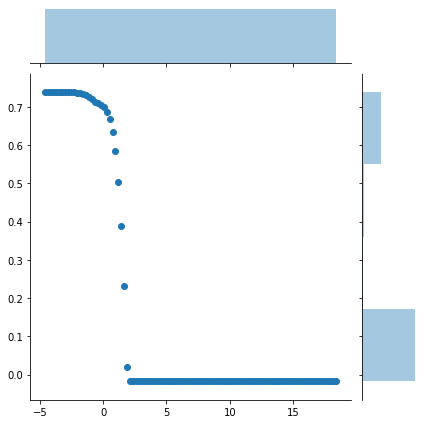

In [192]:
sns.jointplot(x=np.log(param_range), y=test_mean)  #x axis was r_sqaure & y axis was test(lamda) 

In [193]:
np.where(test_mean==max(test_mean))

(array([8], dtype=int64),)

In [194]:
param_range[8]

0.06428073117284319

In [197]:
lm_l_best = Lasso(alpha = param_range[31])

In [198]:
lm_l_best.fit(X_train_s, y_train)

Lasso(alpha=13.530477745798061, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [199]:
r2_score(y_test, lm_l_best.predict(X_test_s))

-0.0011193237204489837

In [201]:
r2_score(y_train,lm_l_best.predict(X_train_s))

0.0